## PREDICT  WHICH  INDIVIDUALS ARE MOST LIKELY TO HAVE OR USE A BANK ACCOUNT



### FINANCIAL INCLUSION IN AFRICA


#### Zindi Knowledge Competition

## Business Objective

The objective of this analysis is to create a machine learning model to predict which individuals are most likely to have or use a bank account.

### DATA COLUMN DESCRIPTION

* country: Country interviewee is in.
* year: Year survey was done in.
* uniqueid: Unique identifier for each interviewee
* location_type: Type of location: Rural, Urban
* cellphone_access: If interviewee has access to a cellphone: Yes, No
* household_size: Number of people living in one house
* age_of_respondent: The age of the interviewee
* gender_of_respondent: Gender of interviewee: Male, Female
* relationship_with_head: The interviewees relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
* marital_status: The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Dont know
* education_level: Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
* job_type: Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer


In [194]:
 pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [195]:
# Loading the libraries and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Libraries for Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

##Libraries for Model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

a
#hper parameter modelin
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# to remove warnings
import warnings
warnings.filterwarnings('ignore') 

In [48]:
# read in dataset

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

## UNDERSTANDING THE DATA ( Descriptive Statistics)

In [49]:
# check the shape of the data
print(f'The shape of the train data is {train.shape}')
print(f'The shape of the test data is {test.shape}')

# Each row represents a person, each column contains customer’s attributes described on the column data.
train.head()


The shape of the train data is (23524, 13)
The shape of the test data is (10086, 12)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [50]:
#Each row represents a person, each column contains customer’s attributes described on the column test data.

test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [51]:
# check the info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [52]:
# check for missing values

print(f'The number of missing values  {train.isna().sum()}')
print('\n')
print(f'The percentage of missing values  {train.isna().mean() * 100}')

The number of missing values  country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


The percentage of missing values  country                   0.0
year                      0.0
uniqueid                  0.0
bank_account              0.0
location_type             0.0
cellphone_access          0.0
household_size            0.0
age_of_respondent         0.0
gender_of_respondent      0.0
relationship_with_head    0.0
marital_status            0.0
education_level           0.0
job_type                  0.0
dtype: float64


In [53]:
# checking the parameters of the first 3 rows

train.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [81]:
# understanding the location_type features

train.country.value_counts()

Rwanda      6098
Tanzania    4678
Kenya       4222
Uganda      1468
Name: country, dtype: int64

In [54]:
# understanding the location_type features

train.location_type.value_counts()


Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [55]:
# understanding the household_size features

train['household_size'].unique()

array([ 3,  5,  8,  7,  1,  6,  4, 10,  2, 11,  9, 12, 16, 15, 13, 14, 21,
       18, 17, 20], dtype=int64)

In [56]:
# understanding the age_of_respondent features

train['age_of_respondent'].unique()

array([ 24,  70,  26,  34,  32,  42,  54,  76,  40,  69,  64,  31,  38,
        47,  27,  48,  25,  21,  18,  22,  58,  55,  62,  29,  35,  45,
        67,  19,  80,  66,  50,  33,  28,  51,  16,  17,  30,  37,  59,
        65,  46,  56,  52,  23,  43,  49,  44,  72,  53,  63,  39,  81,
        78,  36,  20,  60,  95,  71,  57,  85,  68,  41,  61,  75,  86,
        73,  93,  74,  88,  90,  77,  84,  82,  89,  79,  83,  94,  87,
        92,  91,  98,  97,  96,  99, 100], dtype=int64)

In [57]:
# understanding the gender_of_respondent features

train['gender_of_respondent'].value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [58]:
# understanding the relationship_with_head features

train['relationship_with_head'].value_counts()

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

In [59]:
# understanding the marital_status features

train['marital_status'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [85]:
# understanding the education_level features

train['education_level'].value_counts()

Primary education                  8950
No formal education                3168
Secondary education                2935
Tertiary education                  823
Vocational/Specialised training     566
Other/Dont know/RTA                  24
Name: education_level, dtype: int64

In [61]:
# understanding the education_level features

train['year'].value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [62]:
# understanding the target variable features

train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [63]:
train.head(2)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [65]:
# Now lets describe our dataset while transposing

train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


### $\color{red}{\text{SPLITTING INTO TRAIN AND TEST DATA }}$

In [66]:
# preventing data leakage, so we will split our train and test here and use our train test for our exploratory Data Analysis.


train,test_1 = train_test_split(train,test_size=0.3,random_state=1)

In [67]:
train.head(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
4614,Kenya,2018,uniqueid_4615,No,Urban,No,3,16,Male,Child,Single/Never Married,Primary education,Remittance Dependent
15376,Tanzania,2017,uniqueid_574,No,Urban,No,2,52,Male,Head of Household,Single/Never Married,Secondary education,Self employed
17797,Tanzania,2017,uniqueid_2995,No,Rural,No,3,22,Male,Other relative,Divorced/Seperated,Primary education,Self employed
1858,Kenya,2018,uniqueid_1859,No,Rural,No,9,22,Male,Child,Single/Never Married,Secondary education,Farming and Fishing
13082,Rwanda,2016,uniqueid_7015,Yes,Rural,Yes,7,39,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
4080,Kenya,2018,uniqueid_4081,Yes,Urban,Yes,1,28,Female,Head of Household,Single/Never Married,Secondary education,Informally employed
16980,Tanzania,2017,uniqueid_2178,No,Urban,Yes,2,35,Female,Spouse,Single/Never Married,Primary education,Self employed
1444,Kenya,2018,uniqueid_1445,No,Rural,Yes,2,43,Female,Spouse,Married/Living together,Primary education,Informally employed
3873,Kenya,2018,uniqueid_3874,No,Rural,Yes,5,26,Female,Spouse,Married/Living together,Primary education,Informally employed
21051,Tanzania,2017,uniqueid_6249,No,Urban,No,1,44,Male,Head of Household,Married/Living together,Primary education,Self employed


In [68]:
#train shape

train.shape

(16466, 13)

In [69]:
test.shape

(10086, 12)

### UNIVARIATE EXPLORATION

In [70]:
# let's check the proportion of customers that has churned,

#Target variable

train['bank_account'].describe()

count     16466
unique        2
top          No
freq      14146
Name: bank_account, dtype: object

Text(0.5, 0, 'Bank Account')

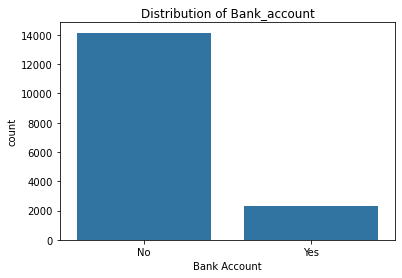

In [71]:
# let's plot the countplot for target variable

base_color = sns.color_palette()[0]
sns.countplot(data = train, x = 'bank_account', color = base_color);
plt.title("Distribution of Bank_account")
plt.xlabel('Bank Account')

## NUMERICAL FEATURES RELATIONSHIPS

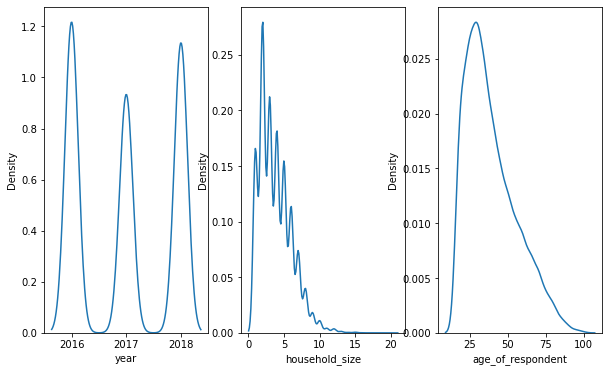

In [73]:
col = ['year', 'household_size','age_of_respondent'] #numerical features
fig = plt.figure(figsize=(10,6))
a = 1
b = 3
c = 1
for  i in col:
        plt.subplot(a,b,c)
        sns.kdeplot(x=train[i],data=train, palette ="CMRmap") #plots kde for numerical variable
        c = c + 1

* Most of the respondents survey were collected in the year 2016, then 2018 and 2017 respectively.
* Majority of the respondent has a toal household size  of 3 to 4.
* The average age of respondents are between 35 to 50.

In [77]:
#train columns

train.columns.values

array(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'bank_account1'], dtype=object)

## CATEGORICAL VARIABLES RELATIONSHIP

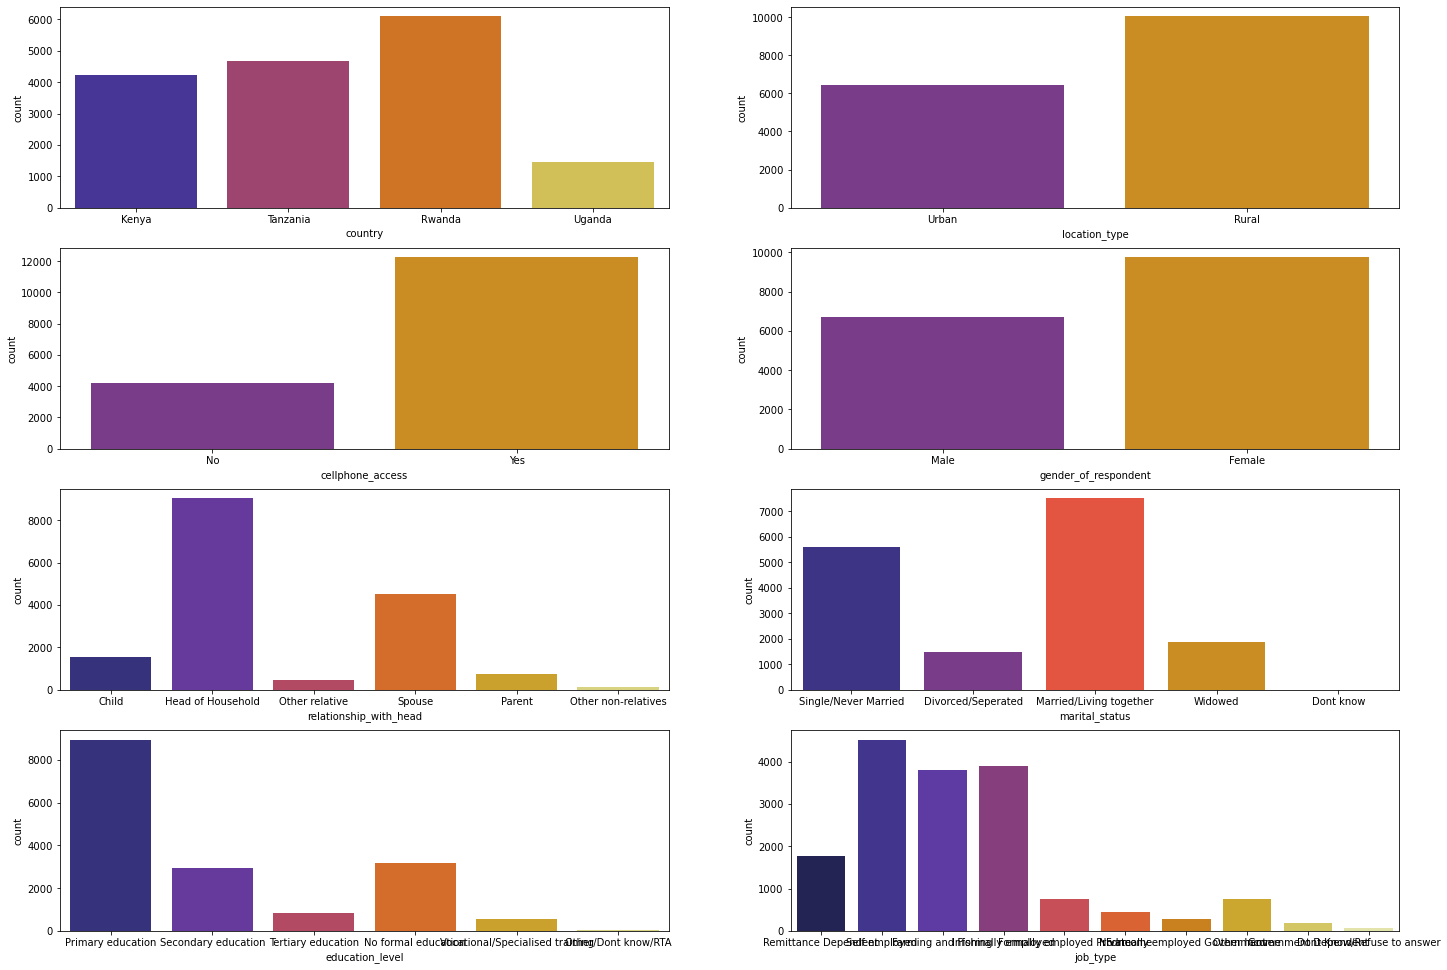

In [80]:
cat_col = ['country','location_type', 'cellphone_access','gender_of_respondent',
            'relationship_with_head','marital_status','education_level','job_type']
fig = plt.figure(figsize=(24,17))
a = 4 #number of rows
b = 2 #number of columns
c = 1 #counter
for  i in cat_col:
        plt.subplot(a,b,c)
        sns.countplot(x= train[i], data=train, palette="CMRmap")
        c = c + 1

### From the visualisations above it can be inferred that;

    
* Most of the respondent are from Rwanda.

* Majority of the respondent are from the rural area. 

* Most of the respondent has access to Cellphone 

* The female folk respond more to the survey and most of them are the head of their household

* Majority of the respondents are married followed by the singles respectively.

* Majority of the respondents had only Primary education followed by those with no formal education and secondary education respectively.

### MULTIVARIATE EXPLORATION

In [75]:
# converting target variable to binary code

bankaccount= {'Yes': 1, 'No': 0}
train['bank_account1'] = train['bank_account'].map(bankaccount)

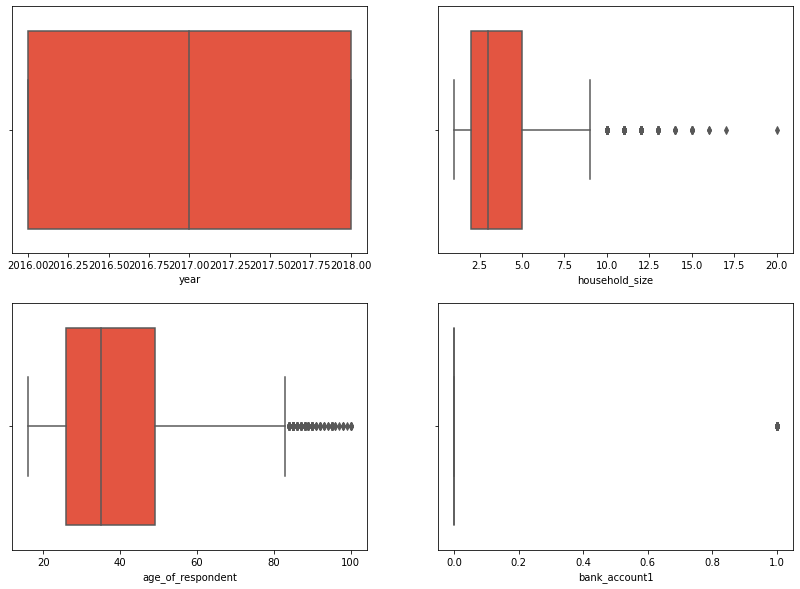

In [76]:
col1 = ['year', 'household_size','age_of_respondent','bank_account1'] #numerical features
fig = plt.figure(figsize=(14,10))
a = 2
b = 2
c = 1
for  i in col1:
        plt.subplot(a,b,c)
        sns.boxplot(x=train[i],data=train, hue='bank_account1', palette ="CMRmap") #plots kde for numerical variable
        c = c + 1

* we could see above that Total Claim amount,Premium Auto Per month and Customer Worth has alot of outliers,this might signal some chances of multicollinearity between the parameters.

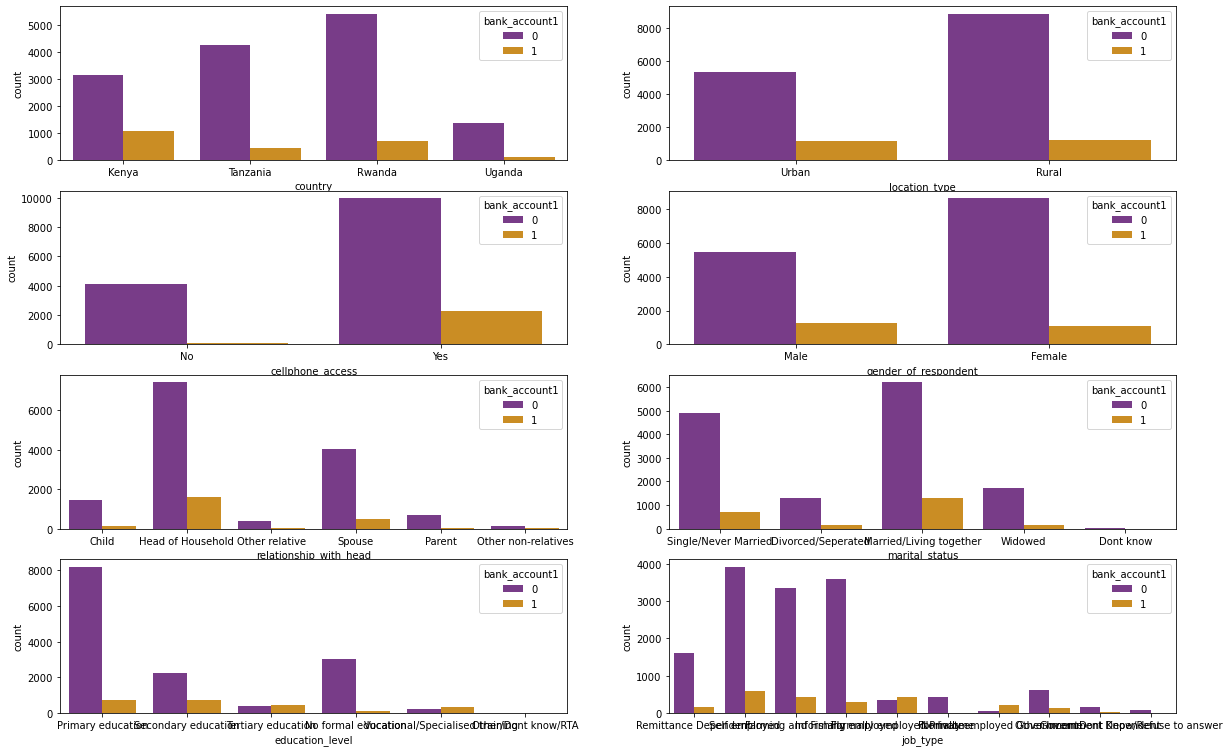

In [86]:
cat_col = ['country','location_type', 'cellphone_access','gender_of_respondent',
            'relationship_with_head','marital_status','education_level','job_type']
fig = plt.figure(figsize=(20,13))
a = 4 #number of rows
b = 2 #number of columns
c = 1 #counter
for  i in cat_col:
        plt.subplot(a,b,c)
        sns.countplot(x= train[i], data=train, hue='bank_account1', palette="CMRmap")
        c = c + 1

* it is safe to assume that majority og the respondent don't have a bank account

### MULTICOLINEARITY IN NUMERICAL VARIABLES 

With a multicolinearity threshold of 0.70,'Total claim amount' column and 'Premium auto per amount' has high multicollinearity but for the sake of our analysis, Total Claim Amount would be dropped as it display less relationship with the target variable. 

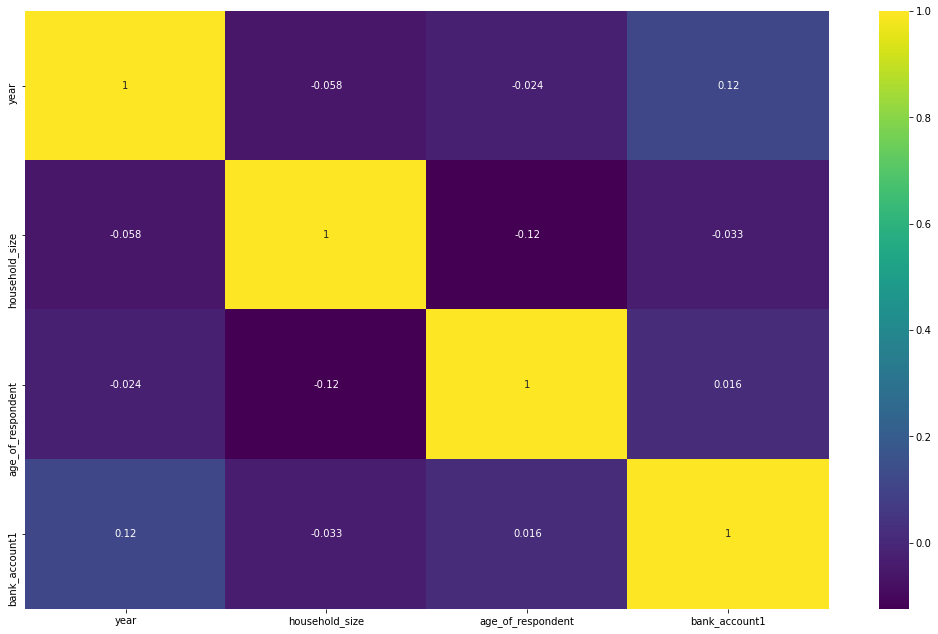

In [87]:
# heatmap showing correlation between the features

plt.figure(figsize=(18,11))

sns.heatmap(train.corr(),annot=True,cmap='viridis');

## PREPROCESSING AND ENCODING 

In [88]:
cols = ['country','location_type', 'cellphone_access','gender_of_respondent',
        'relationship_with_head','marital_status','education_level','job_type']

trainenc = pd.get_dummies(train, columns=cols, drop_first=True)
testenc = pd.get_dummies(test, columns=cols, drop_first=True)

In [89]:
trainenc.shape

(16466, 35)

In [90]:
test.shape

(10086, 12)

In [91]:
testenc.shape

(10086, 33)

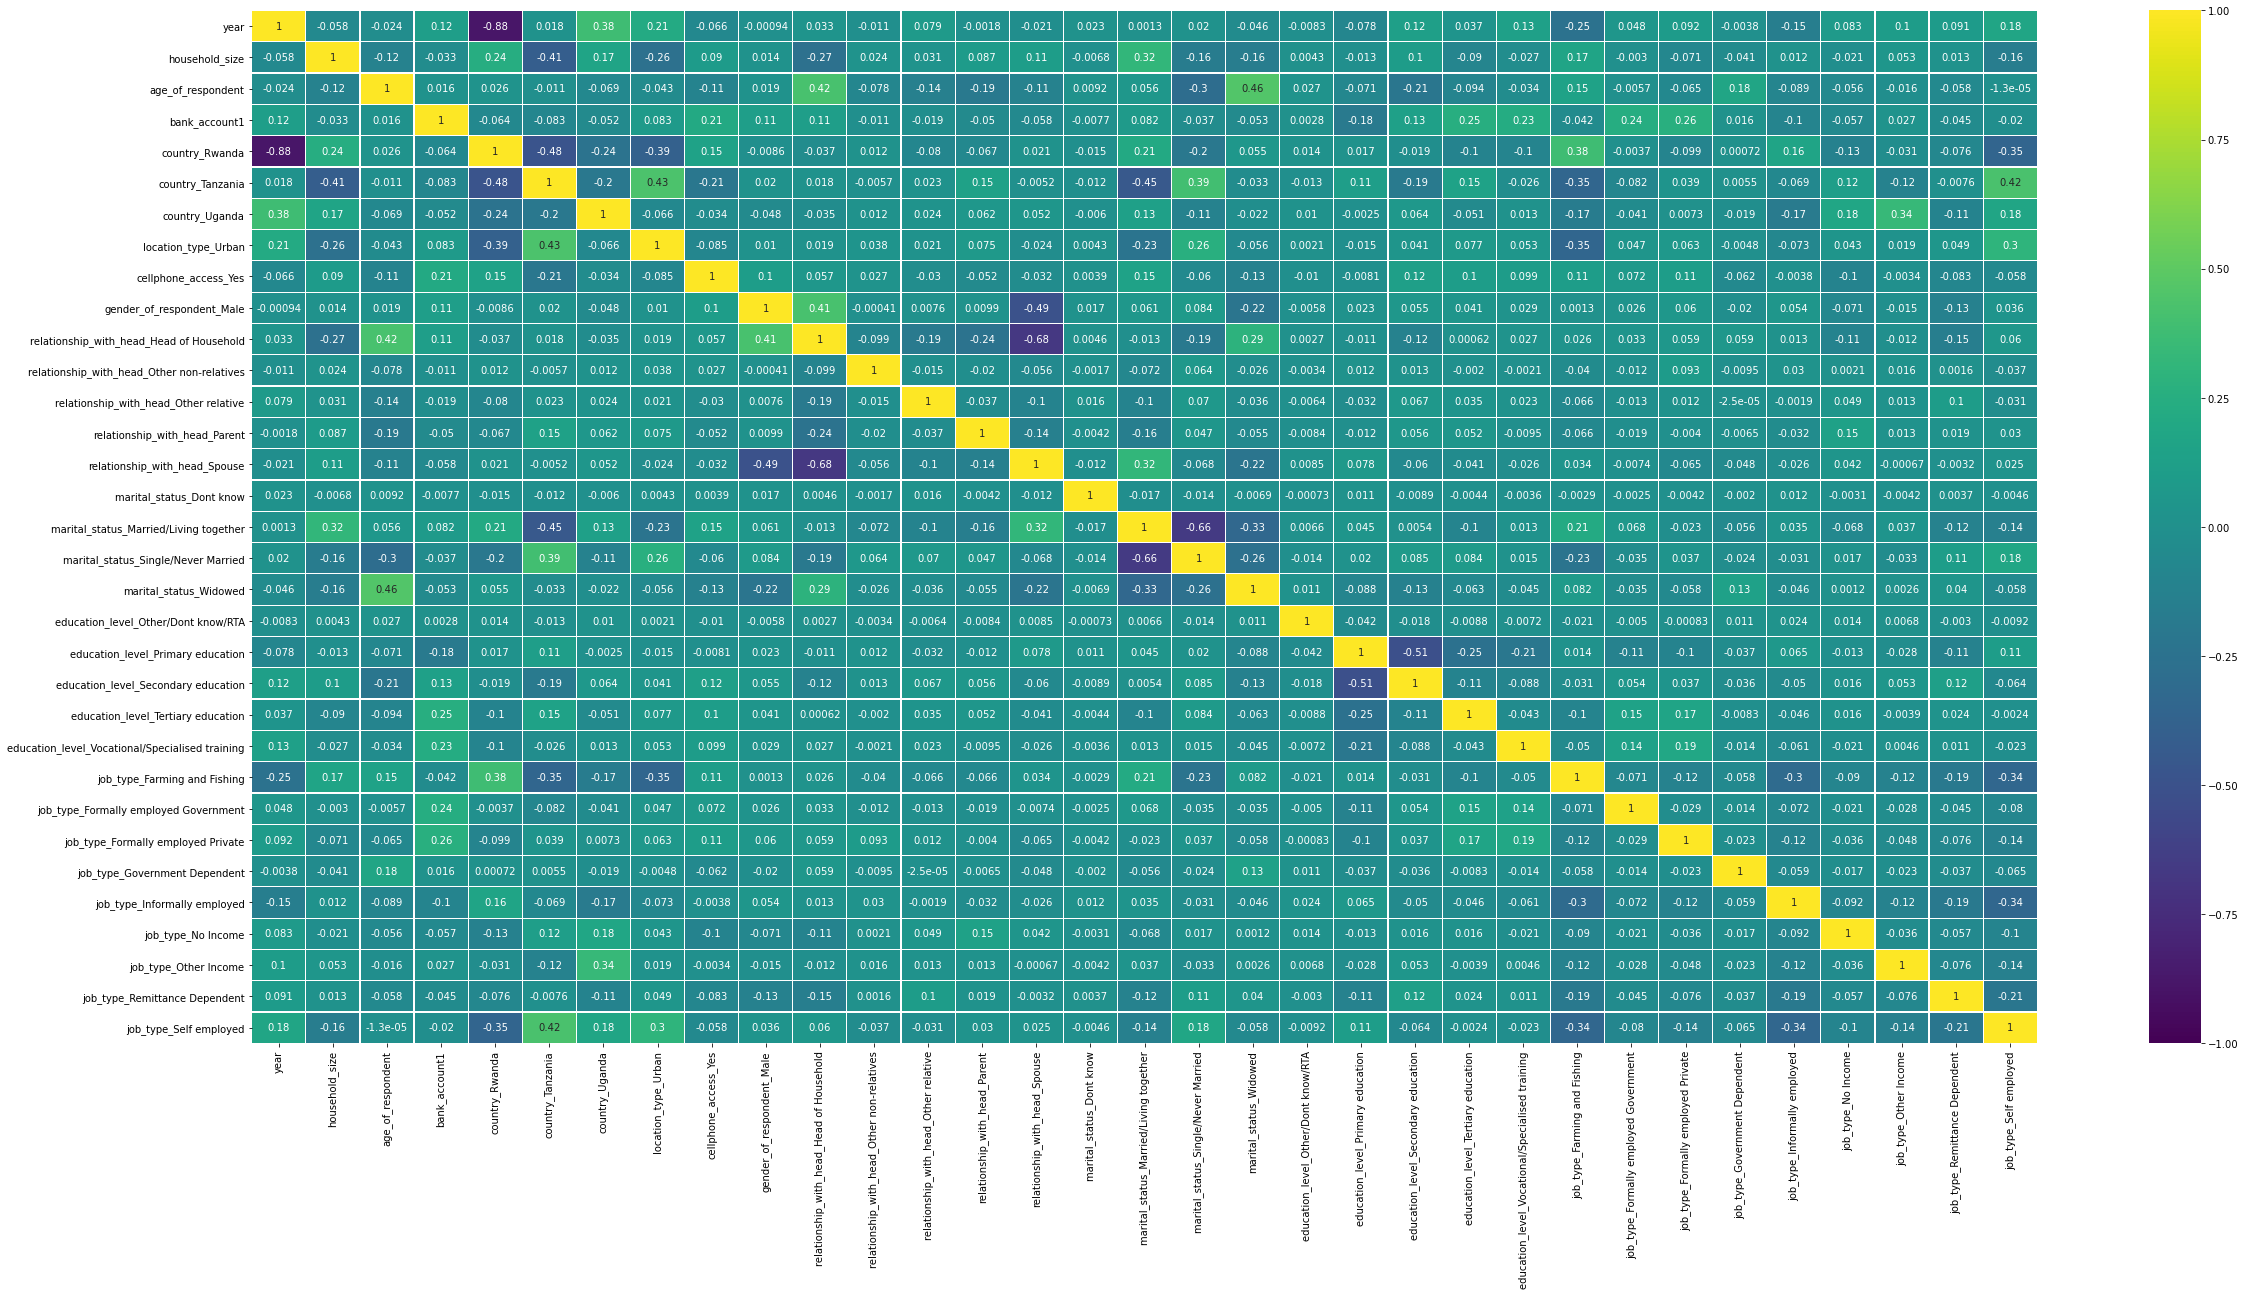

In [92]:
# # correlation heatmap after converting the categorical variables using label encoding to binary numbers

cor = trainenc.corr()
fig = plt.figure(figsize=(40,19))
ax = sns.heatmap(cor, xticklabels=cor.columns,
                 yticklabels=cor.columns, annot=True, linewidths=.2, cmap='viridis', vmin=-1, vmax=1)

### MODELLING WITHOUT REMOVING THE MULTICOLINEARITY PARAMETERS 

In [202]:
# #dropping the dependent variable from our x-train and x-test data

X_train2 = trainenc.drop(['bank_account1','bank_account','uniqueid','year'], axis = 1)
y_train2 = trainenc["bank_account1"]


X_test2 = testenc.drop(['uniqueid','year'], axis = 1).copy()

In [203]:
# Balancing the imbalance in our dataset using Oversampling

X_train_resample, y_train_resample = SMOTE().fit_resample(X_train2, y_train2)

In [227]:
# to confirm the balancing process

print(f'The previous shape of the independent variables is {X_train2.shape}')
print(f'The previous shape of the dependent variable is {y_train2.shape}')
print('\n')

print(f'The current shape of the independent variables is {X_train_resample.shape}')
print(f'The current shape of the dependent variable is {y_train_resample.shape}')

The previous shape of the independent variables is (16466, 31)
The previous shape of the dependent variable is (16466,)


The current shape of the independent variables is (28292, 31)
The current shape of the dependent variable is (28292,)


In [228]:
# Standard Scaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train_resample)
test_x_scaled = scaler.transform(X_test2)

### Model Building

In this section, I would train and test several models but let's begin the simplest classifier (Logistic Regression Classifier) and test it on each of our feature selection. After this, I would try other model such as Ramdon Forest classifier, Desion tree classifier, SVG and KNN.

Before I proceed, let me do a baseline model to get an idea of what score to expect

 Baseline Model Method
 
For this, we would use the original imbalance dataset

precision = tp/(tp+fp)
recall = tp/(tp+fn)
fi_score = 2(precision)(recall)/(precision+recall)

In [229]:
# get value count of dependent variable

train['bank_account1'].value_counts()

0    14146
1     2320
Name: bank_account1, dtype: int64

In [230]:
# for value=> 0
base_precision = 14146 / (14146 + 2320)
base_recall = 14146 / 14146
base_f1 = 2 * (base_precision * base_recall) / (base_precision + base_recall)

# for value => 1
base_precision_1 = 2320 / (14146 + 2320)
base_recall_1 = 2320 / 2320
base_f1_1 = 2 * (base_precision_1 * base_recall_1) / (base_precision_1 + base_recall_1)

In [231]:
# print avg f1 score
print(f' Avg of f1_score of our baseline model is {(base_f1 + base_f1_1)/2}')

 Avg of f1_score of our baseline model is 0.5856025841073758


### LOGISTIC REGRESSION MODEL

In [232]:
# creating an object for the algorithm

model = LogisticRegression()

In [233]:
#training the model

model.fit(x_scaled,y_train_resample)

LogisticRegression()

In [234]:
#predicting using the created model.

y_pred_log_reg = model.predict(test_x_scaled)

In [235]:
acc_log_reg =(model.score(X_train2,y_train2))

print (str( 1- acc_log_reg) )

0.14004615571480628


### DECISION TREE MODEL

In [213]:
# Decision Trees using the model without the multicolinearity

d_tree = DecisionTreeClassifier()

d_tree.fit(x_scaled, y_train_resample)

Y_pred1 = d_tree.predict(test_x_scaled)

In [214]:
#predicting using the created model.

acc_log_reg = (d_tree.score(X_train2,y_train2) )

print (str(1- acc_log_reg))

0.4058059030729989


### $\color{red}{\text{KNN MODEL}}$

In [215]:
# K - Nearest Neighboor Algorithm without the multicolinearity

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_scaled, y_train_resample)

Y_pred2 = knn.predict(test_x_scaled)

In [216]:
#predicting using the created model.

acc_log_reg = (knn.score(X_train2,y_train2) )

print (str(1- acc_log_reg))

0.14332564071419895


### RANDOM FOREST MODEL

In [217]:
# random forest model without the multicolinearity

rft = RandomForestClassifier()
rft.fit(x_scaled, y_train_resample)

Y_pred3 = rft.predict(test_x_scaled)

In [134]:
#predicting using the created model.

acc_log_reg = (rft.score(X_train2,y_train2) )

print (str(1- acc_log_reg))

0.29545730596380415


### XGBOOST

In [200]:
xg_model = XGBClassifier()

In [201]:
xg_model.fit(x_scaled, y_train_resample)

Y_pred4 = xg_model.predict(test_x_scaled)

[22:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [218]:
#predicting using the created model.

acc_log_reg = (xg_model.score(X_train2,y_train2) )

print (str(1- acc_log_reg))

0.28167132272561646


#### RANDOM FOREST HYPER PARAMETER TUNNING AND TESTING


In [236]:
# declaring an object for the classifier
lgr = LogisticRegression()

In [237]:
# defining Parameter Grid

grid = { "C":np.logspace(-3,3,7),"penalty":['l1', 'l2']}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid, cv=10)
logreg_cv.fit(X_train2,y_train2)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [238]:
print('tuned hyperparameters: (best parameters)',logreg_cv.best_params_)
print ('accuracy:', (1 - logreg_cv.best_score_))

tuned hyperparameters: (best parameters) {'C': 0.1, 'penalty': 'l2'}
accuracy: 0.11356736095895115


## PREDICTION USING KNN MODEL

In [177]:
#Make predictions using the features from the test data set
predictions = logreg_cv.predict(test_x_scaled)

#Display our predictions - they are either 0 or 1 or 2 or 3 for each training instance 
#depending on whether our algorithm believes to be the best offer for the customers
predictions


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [184]:
#Create a  DataFrame with the unique ids and our prediction regarding whether the best offer is either 0 or 1 
submission_file = pd.DataFrame({'unique_id':test['uniqueid'] + " x " + test["country"],'bank_account':predictions})


In [185]:
#Visualize the first 5 rows
submission_file.head()

,unique_id,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [186]:
submission_file.to_csv('Submission_financialinclusion.csv')

In [187]:
test.shape

(10086, 12)